Saving scores_data.csv to scores_data.csv

Dataset Preview:
        Batch  User_ID  Score
0  AI_ELITE_7  uid_149      6
1  AI_ELITE_7  uid_148      6
2  AI_ELITE_7  uid_147      7
3  AI_ELITE_7  uid_146      7
4  AI_ELITE_7  uid_145      4

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Batch    149 non-null    object
 1   User_ID  149 non-null    object
 2   Score    149 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.6+ KB
None

Batch Performance Summary:
        Batch  Total_Students  Average_Score  Median_Score  Max_Score  \
0  AI_ELITE_4              48       3.791667           4.0          7   
1  AI_ELITE_6              48       4.229167           4.0          7   
2  AI_ELITE_7              53       5.056604           5.0          7   

   Min_Score  Std_Deviation  
0          0       1.443376  
1          0       1

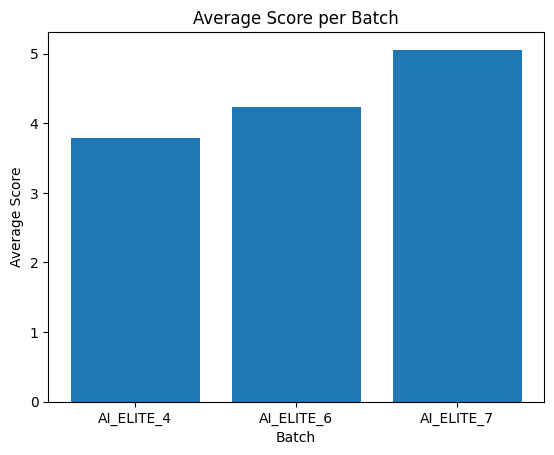

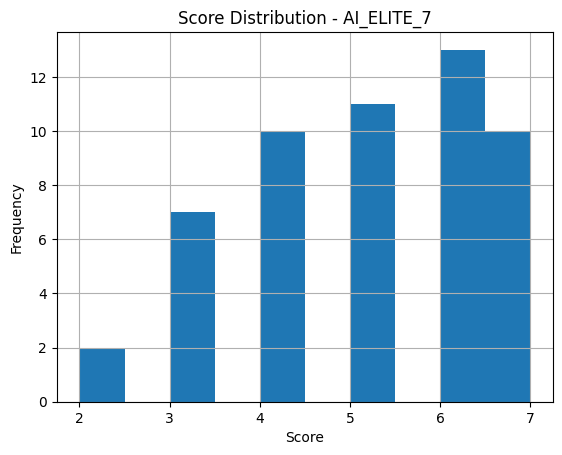

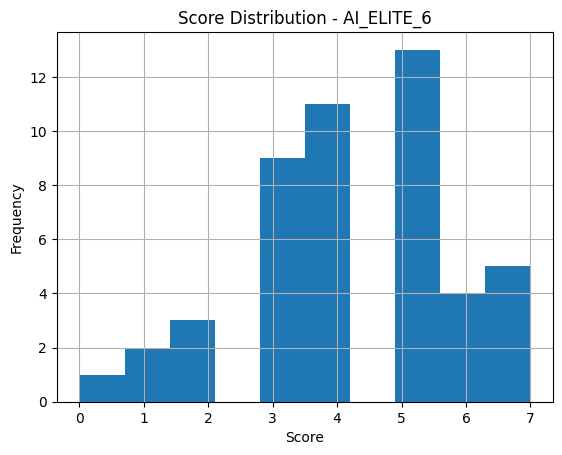

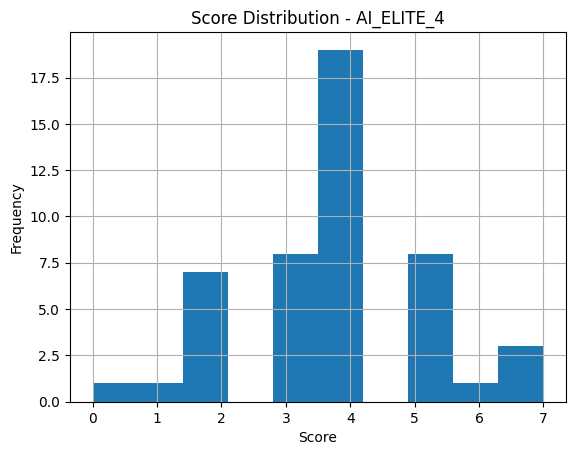


High Performers (Score >= 6):
Batch
AI_ELITE_4     4
AI_ELITE_6     9
AI_ELITE_7    23
Name: User_ID, dtype: int64

Low Performers (Score <= 2):
Batch
AI_ELITE_4    9
AI_ELITE_6    6
AI_ELITE_7    2
Name: User_ID, dtype: int64

Batch Ranking Based on Average Score:
        Batch  Total_Students  Average_Score  Median_Score  Max_Score  \
2  AI_ELITE_7              53       5.056604           5.0          7   
1  AI_ELITE_6              48       4.229167           4.0          7   
0  AI_ELITE_4              48       3.791667           4.0          7   

   Min_Score  Std_Deviation  
2          2       1.446682  
1          0       1.640441  
0          0       1.443376  

===== FINAL INSIGHTS =====

Top Performing Batch: AI_ELITE_7
Weakest Performing Batch: AI_ELITE_4

Observations:
- Higher average indicates better overall performance.
- High standard deviation indicates inconsistent performance.
- Presence of low scorers suggests need for intervention.
- Larger cluster in 6-7 range i

In [1]:
# ==========================================
# Batch Performance Analysis
# ==========================================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------
# Step 2: Upload CSV in Google Colab
# ------------------------------------------
from google.colab import files
uploaded = files.upload()

# Replace filename if needed
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# ------------------------------------------
# Step 3: Data Cleaning
# ------------------------------------------

# Remove extra spaces from column names
df.columns = df.columns.str.strip()

# Extract numeric score from "6 / 7" format
df["Score"] = df["Score"].str.split("/").str[0].str.strip().astype(int)

# Check basic info
print("\nDataset Preview:")
print(df.head())

print("\nDataset Info:")
print(df.info())

# ------------------------------------------
# Step 4: Summary Statistics per Batch
# ------------------------------------------

batch_summary = df.groupby("Batch")["Score"].agg(
    Total_Students="count",
    Average_Score="mean",
    Median_Score="median",
    Max_Score="max",
    Min_Score="min",
    Std_Deviation="std"
).reset_index()

print("\nBatch Performance Summary:")
print(batch_summary)

# ------------------------------------------
# Step 5: Score Distribution Analysis
# ------------------------------------------

print("\nScore Distribution per Batch:")
distribution = df.groupby(["Batch", "Score"]).size().unstack(fill_value=0)
print(distribution)

# ------------------------------------------
# Step 6: Visualization - Average Score
# ------------------------------------------

plt.figure()
plt.bar(batch_summary["Batch"], batch_summary["Average_Score"])
plt.xlabel("Batch")
plt.ylabel("Average Score")
plt.title("Average Score per Batch")
plt.show()

# ------------------------------------------
# Step 7: Visualization - Score Distribution per Batch
# ------------------------------------------

batches = df["Batch"].unique()

for batch in batches:
    plt.figure()
    df[df["Batch"] == batch]["Score"].hist()
    plt.xlabel("Score")
    plt.ylabel("Frequency")
    plt.title(f"Score Distribution - {batch}")
    plt.show()

# ------------------------------------------
# Step 8: High Performer & Low Performer Analysis
# ------------------------------------------

print("\nHigh Performers (Score >= 6):")
high_perf = df[df["Score"] >= 6].groupby("Batch")["User_ID"].count()
print(high_perf)

print("\nLow Performers (Score <= 2):")
low_perf = df[df["Score"] <= 2].groupby("Batch")["User_ID"].count()
print(low_perf)

# ------------------------------------------
# Step 9: Performance Ranking of Batches
# ------------------------------------------

ranked_batches = batch_summary.sort_values(by="Average_Score", ascending=False)
print("\nBatch Ranking Based on Average Score:")
print(ranked_batches)

# ------------------------------------------
# Step 10: Insights Generation
# ------------------------------------------

print("\n===== FINAL INSIGHTS =====")

top_batch = ranked_batches.iloc[0]["Batch"]
weak_batch = ranked_batches.iloc[-1]["Batch"]

print(f"\nTop Performing Batch: {top_batch}")
print(f"Weakest Performing Batch: {weak_batch}")

print("\nObservations:")
print("- Higher average indicates better overall performance.")
print("- High standard deviation indicates inconsistent performance.")
print("- Presence of low scorers suggests need for intervention.")
print("- Larger cluster in 6-7 range indicates academic strength.")

print("\nAnalysis Completed Successfully.")